<a href="https://colab.research.google.com/github/Divyanshi-2211/Classification-Model/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML Research/heart.csv")

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# One hot encoding
one_hot = pd.get_dummies(df['Sex'])
df = pd.concat([df,one_hot], axis=1)
df = df.drop('Sex',axis=1)

In [ ]:
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0


In [ ]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
dict = {'ASY':0, 'NAP':1, 'ATA':2, 'TA':4}
df['ChestPainType'] = df['ChestPainType'].map(dict)
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,2,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,2,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,4,110,264,0,Normal,132,N,1.2,Flat,1,0,1
914,68,0,144,193,1,Normal,141,N,3.4,Flat,1,0,1
915,57,0,130,131,0,Normal,115,Y,1.2,Flat,1,0,1
916,57,2,130,236,0,LVH,174,N,0.0,Flat,1,1,0


In [ ]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
dict={'Normal':0,'LVH':1,'ST':2}
df['RestingECG'] = df['RestingECG'].map(dict)
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,2,140,289,0,0,172,N,0.0,Up,0,0,1
1,49,1,160,180,0,0,156,N,1.0,Flat,1,1,0
2,37,2,130,283,0,2,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,0,108,Y,1.5,Flat,1,1,0
4,54,1,150,195,0,0,122,N,0.0,Up,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,4,110,264,0,0,132,N,1.2,Flat,1,0,1
914,68,0,144,193,1,0,141,N,3.4,Flat,1,0,1
915,57,0,130,131,0,0,115,Y,1.2,Flat,1,0,1
916,57,2,130,236,0,1,174,N,0.0,Flat,1,1,0


In [ ]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
dict={'N':0,'Y':1}
df['ExerciseAngina'] = df['ExerciseAngina'].map(dict)
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,2,140,289,0,0,172,0,0.0,Up,0,0,1
1,49,1,160,180,0,0,156,0,1.0,Flat,1,1,0
2,37,2,130,283,0,2,98,0,0.0,Up,0,0,1
3,48,0,138,214,0,0,108,1,1.5,Flat,1,1,0
4,54,1,150,195,0,0,122,0,0.0,Up,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,4,110,264,0,0,132,0,1.2,Flat,1,0,1
914,68,0,144,193,1,0,141,0,3.4,Flat,1,0,1
915,57,0,130,131,0,0,115,1,1.2,Flat,1,0,1
916,57,2,130,236,0,1,174,0,0.0,Flat,1,1,0


In [ ]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
dict={'Flat':0,'Up':1,'Down':2}
df['ST_Slope'] = df['ST_Slope'].map(dict)
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,2,140,289,0,0,172,0,0.0,1,0,0,1
1,49,1,160,180,0,0,156,0,1.0,0,1,1,0
2,37,2,130,283,0,2,98,0,0.0,1,0,0,1
3,48,0,138,214,0,0,108,1,1.5,0,1,1,0
4,54,1,150,195,0,0,122,0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,4,110,264,0,0,132,0,1.2,0,1,0,1
914,68,0,144,193,1,0,141,0,3.4,0,1,0,1
915,57,0,130,131,0,0,115,1,1.2,0,1,0,1
916,57,2,130,236,0,1,174,0,0.0,0,1,1,0


In [ ]:
x = df.drop('HeartDisease',axis = 1)
y = df['HeartDisease']

In [ ]:
# train test split of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 30, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(888, 12)
(30, 12)
(888,)
(30,)


In [ ]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train,y_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score,recall_score
precision_scores = {}
recall_scores = {}
accuracy_scores = {}
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_train_lr_pred = lr.predict(x_train)
y_test_lr_pred = lr.predict(x_test)
acc_lr=accuracy_score(y_test_lr_pred,y_test)
print(acc_lr*100)

86.66666666666667


In [ ]:
accuracy_scores['logistic regression']=acc_lr*100
precision_scores['logistic regression']=precision_score(y_test,y_test_lr_pred,average='weighted')
recall_scores['logistic regression']=recall_score(y_test,y_test_lr_pred,average='weighted')

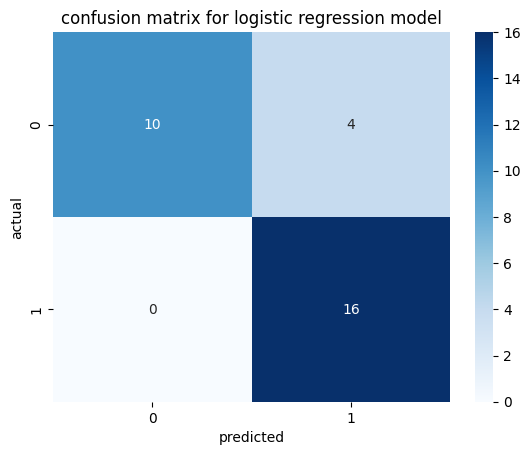

In [ ]:
cm_lr=confusion_matrix(y_test,y_test_lr_pred)
sns.heatmap(cm_lr,annot=True,cmap='Blues')
plt.title("confusion matrix for logistic regression model")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)
acc_dt=accuracy_score(y_test_dt_pred,y_test)
print(acc_dt*100)

86.66666666666667


In [ ]:
accuracy_scores['decision tree']=acc_dt*100
precision_scores['decision tree']=precision_score(y_test,y_test_dt_pred,average='weighted')
recall_scores['decision tree']=recall_score(y_test,y_test_dt_pred,average='weighted')

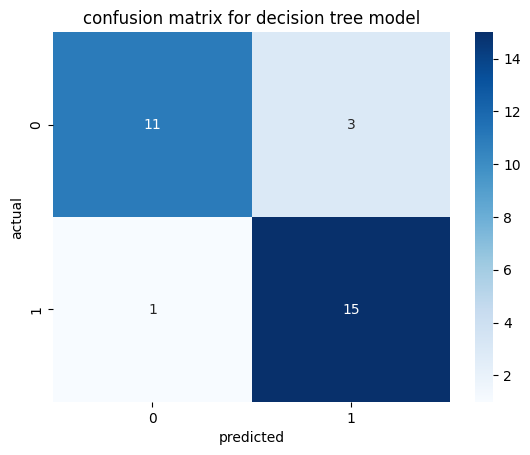

In [ ]:
cm_dt=confusion_matrix(y_test,y_test_dt_pred)
sns.heatmap(cm_dt,annot=True,cmap='Blues')
plt.title("confusion matrix for decision tree model")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_rf_pred=rf.predict(x_train)
y_test_rf_pred=rf.predict(x_test)
acc_rf=accuracy_score(y_test_rf_pred,y_test)
print(acc_rf*100)

86.66666666666667


In [ ]:
accuracy_scores['random forest']=acc_rf*100
precision_scores['random forest']=precision_score(y_test,y_test_rf_pred,average='weighted')
recall_scores['random forest']=recall_score(y_test,y_test_rf_pred,average='weighted')

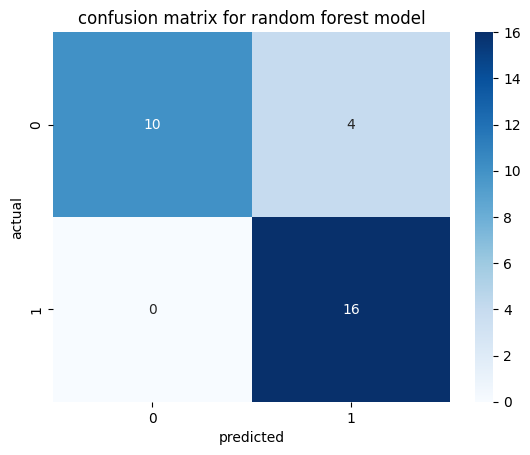

In [ ]:
cm_rf=confusion_matrix(y_test,y_test_rf_pred)
sns.heatmap(cm_rf,annot=True,cmap='Blues')
plt.title("confusion matrix for random forest model")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_train_nb_pred=nb.predict(x_train)
y_test_nb_pred=nb.predict(x_test)
acc_nb=accuracy_score(y_test_nb_pred,y_test)
print(acc_nb*100)

90.0


In [ ]:
accuracy_scores['naive bayes']=acc_nb*100
precision_scores['naive bayes']=precision_score(y_test,y_test_nb_pred,average='weighted')
recall_scores['naive bayes']=recall_score(y_test,y_test_nb_pred,average='weighted')

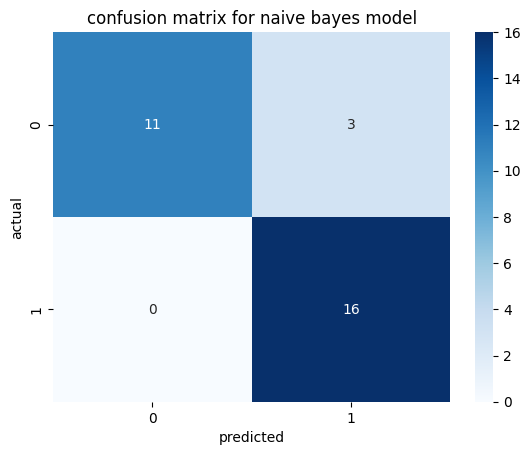

In [ ]:
cm_nb=confusion_matrix(y_test,y_test_nb_pred)
sns.heatmap(cm_nb,annot=True,cmap='Blues')
plt.title("confusion matrix for naive bayes model")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_train_svm_pred=svm.predict(x_train)
y_test_svm_pred=svm.predict(x_test)
acc_svm=accuracy_score(y_test_svm_pred,y_test)
print(acc_svm*100)

86.66666666666667


In [ ]:
accuracy_scores['support vector machine']=acc_svm*100
precision_scores['support vector machine']=precision_score(y_test,y_test_svm_pred,average='weighted')
recall_scores['support vector machine']=recall_score(y_test,y_test_svm_pred,average='weighted')

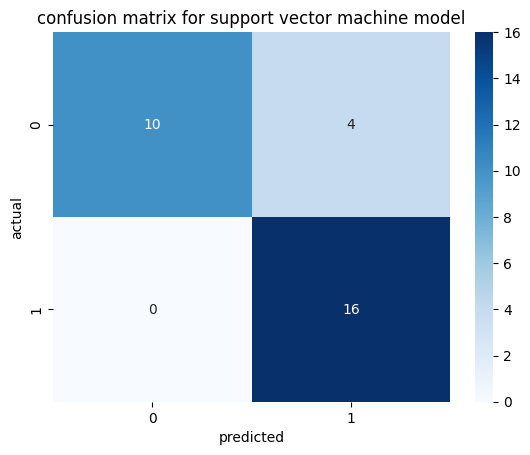

In [ ]:
cm_svm=confusion_matrix(y_test,y_test_svm_pred)
sns.heatmap(cm_svm,annot=True,cmap='Blues')
plt.title("confusion matrix for support vector machine model")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_train_knn_pred=knn.predict(x_train)
y_test_knn_pred=knn.predict(x_test)
acc_knn=accuracy_score(y_test_knn_pred,y_test)
print(acc_knn*100)

86.66666666666667


In [ ]:
accuracy_scores['k_nearest neighbours']=acc_knn*100
precision_scores['k_nearest neighbours']=precision_score(y_test,y_test_knn_pred,average='weighted')
recall_scores['k_nearest neighbours']=recall_score(y_test,y_test_knn_pred,average='weighted')

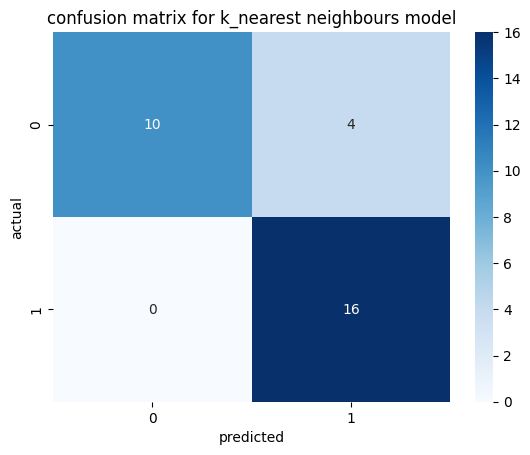

In [ ]:
cm_knn=confusion_matrix(y_test,y_test_knn_pred)
sns.heatmap(cm_knn,annot=True,cmap='Blues')
plt.title("confusion matrix for k_nearest neighbours model")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

{'logistic regression': 86.66666666666667, 'decision tree': 86.66666666666667, 'random forest': 86.66666666666667, 'naive bayes': 90.0, 'support vector machine': 86.66666666666667, 'k_nearest neighbours': 86.66666666666667}


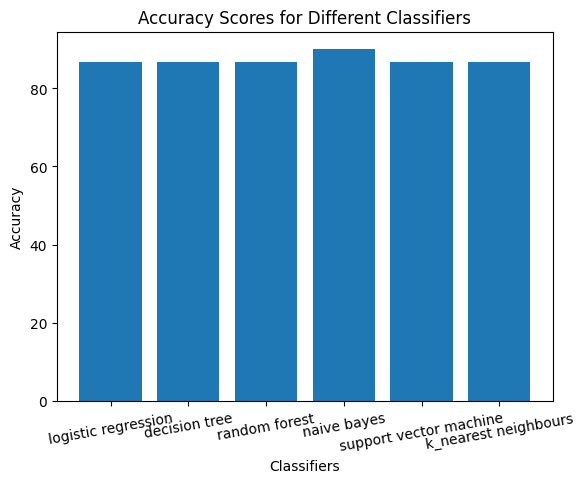

In [ ]:
print(accuracy_scores)
plt.bar(range(len(accuracy_scores)),list(accuracy_scores.values()),align='center')
plt.xticks(range(len(accuracy_scores)),list(accuracy_scores.keys()),rotation=10)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Classifiers')
plt.show()

{'logistic regression': 0.8933333333333333, 'decision tree': 0.8722222222222221, 'random forest': 0.8933333333333333, 'naive bayes': 0.9157894736842105, 'support vector machine': 0.8933333333333333, 'k_nearest neighbours': 0.8933333333333333}


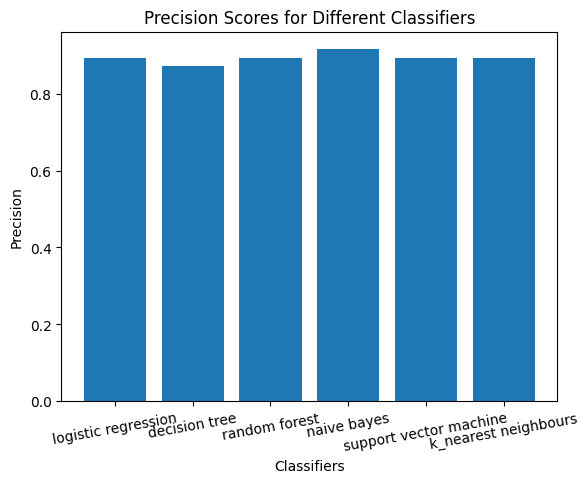

In [ ]:
print(precision_scores)
plt.bar(range(len(precision_scores)),list(precision_scores.values()),align='center')
plt.xticks(range(len(precision_scores)),list(precision_scores.keys()),rotation=10)
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.title('Precision Scores for Different Classifiers')
plt.show()

{'logistic regression': 0.8666666666666667, 'decision tree': 0.8666666666666667, 'random forest': 0.8666666666666667, 'naive bayes': 0.9, 'support vector machine': 0.8666666666666667, 'k_nearest neighbours': 0.8666666666666667}


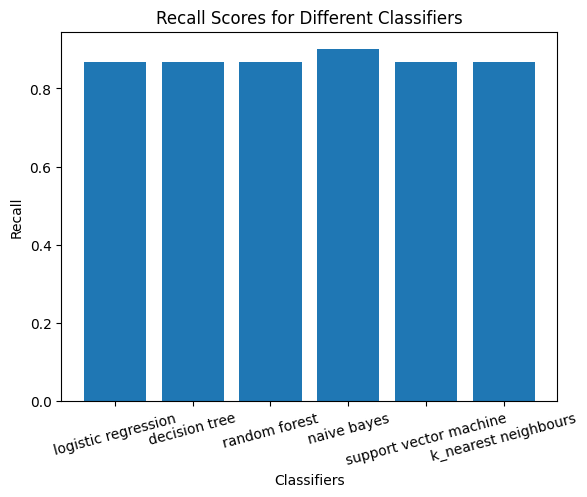

In [ ]:
print(recall_scores)
plt.bar(range(len(recall_scores)),list(recall_scores.values()),align='center')
plt.xticks(range(len(recall_scores)),list(recall_scores.keys()),rotation=15)
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.title('Recall Scores for Different Classifiers')
plt.show()

In [ ]:
pip install bayesian-optimization


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_heart_disease


ImportError: cannot import name 'load_heart_disease' from 'sklearn.datasets' (/usr/local/lib/python3.10/dist-packages/sklearn/datasets/__init__.py)